#  COMPARISON BETWEEN GINI AND ENTROPY  



#  In the following small project, I will analyze the difference between entropy and Gini performance. I will generate random datasets with various ratios of informative features to total features and analyze the difference between tree structures. After that, I will compare the difference between training times of Gini and Entropy.

In [3]:
from sklearn.tree import DecisionTreeClassifier
import graphviz
import numpy as np
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree


In [4]:
sns.set()

# 50% OF INFORMATIVE FEATURES WITH SLIGHTLY UNBALANCED DATA 

In [125]:
# Currently, I will generate 200 samples of data, grouped by two classes (Apple and Melon) with the ratio of classes 70 to 30. 
#I will create 20 features, 10 of which are informative, 8 redundant and 2 repeated. I will train the data on Decision Trees
#and see how trees with entropy criterion compare with the one with Gini criterion


In [126]:
# creating the dataset 
X, y = datasets.make_classification(n_samples=200,  n_classes=2,n_informative=10, n_repeated=2, n_redundant=8,
                                     weights=[0.7, 0.3], random_state=42)



In [127]:
# I will just label features from 1 to 20 
features_name =[str(i) for i in range(20)]

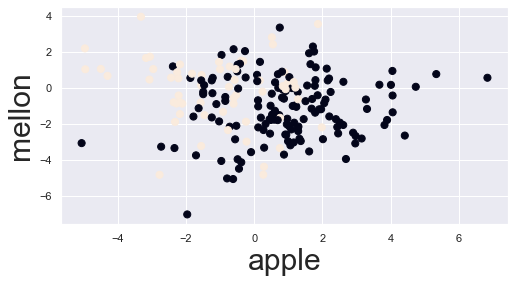

In [128]:
# visualizing the generated data, we can see a certain overlap between classes
fig, ax = plt.subplots(figsize=(8, 4))
plt.xlabel("apple", fontsize=30)
plt.ylabel("mellon", fontsize=30)
plt.scatter(X[:,0], X[:,1], s=50, c=y)

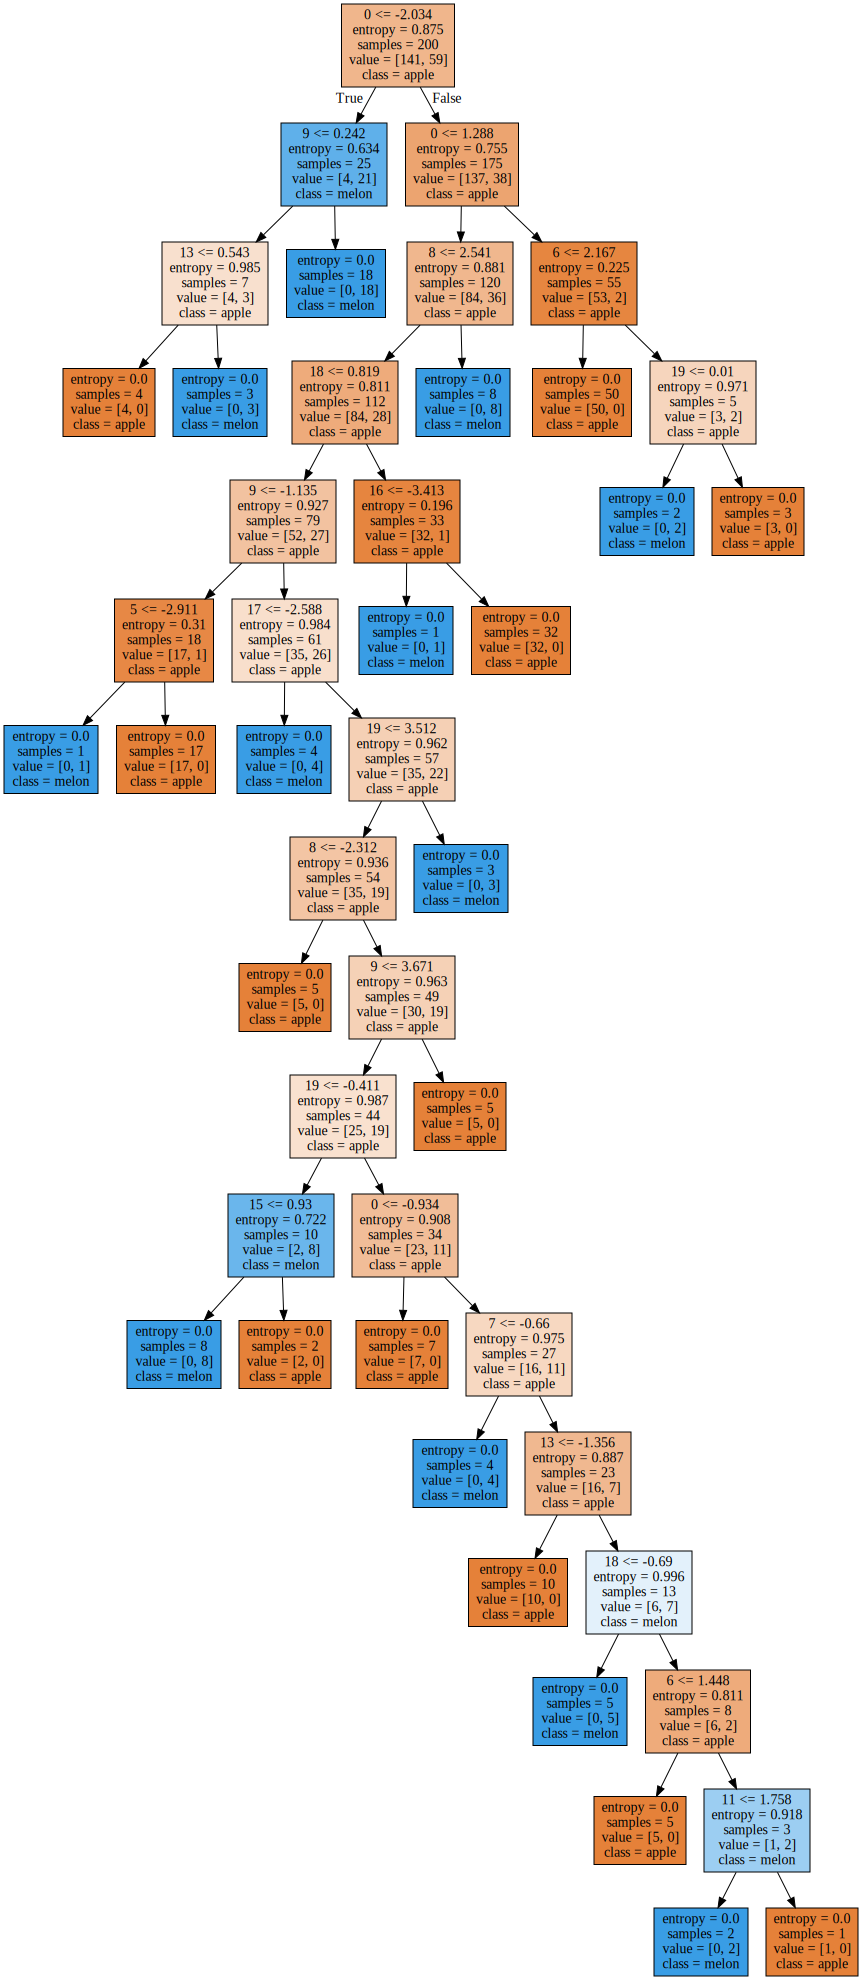

<Figure size 3600x3600 with 0 Axes>

In [129]:
# Now I will train a tree, using entropy criterion. After that, I will visualize the tree using graphviz
clf = DecisionTreeClassifier(random_state=0 ,criterion = 'entropy' )
clf.fit(X, y)
fig = plt.figure(figsize=(50,50))
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names= features_name,  
                                class_names=['apple', 'melon'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

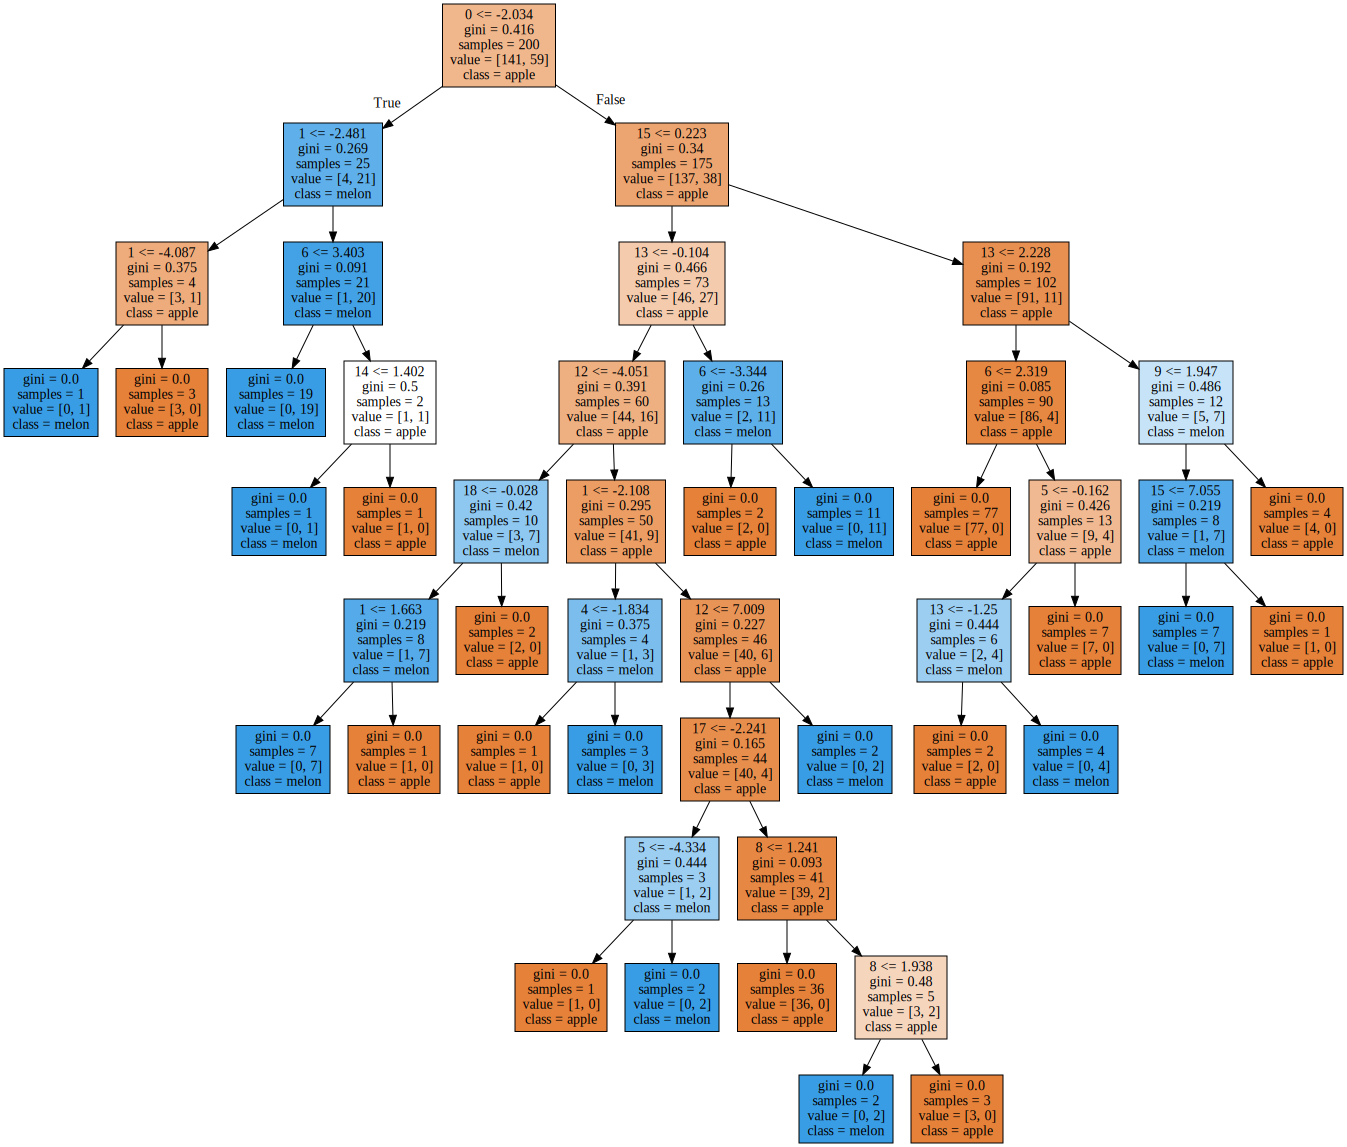

In [130]:
# I will do exactly the same with the same data, however, I will use the gini index

clf = DecisionTreeClassifier(random_state=0 ,criterion = 'gini' )
clf.fit(X, y)
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names= features_name,  
                                class_names=['apple', 'melon'],
                                filled=True)

graph = graphviz.Source(dot_data, format="png")
graph

# CONCLUSION FOR 50% INFORMATIVE FEATURES PART:


# We can clearly see the difference between tree structures. Even starting from the first split the tree with entropy criterion uses "9" and "0" features as child nodes, while tree with gini index criterion uses "1" and "15" features. In addition, the whole tree structures as different with different levels of depth and splits



# 90% INFORMATIVE FEATURES AND 70 TO 30 IMBLANACED DATA, 20 FEATURES OVERALL

# Now I will repeat the process, but this time I will add much more informative features

In [133]:
X, y = datasets.make_classification(n_samples=200,  n_classes=2,n_informative=18,
                                     weights=[0.7, 0.3], random_state=42)

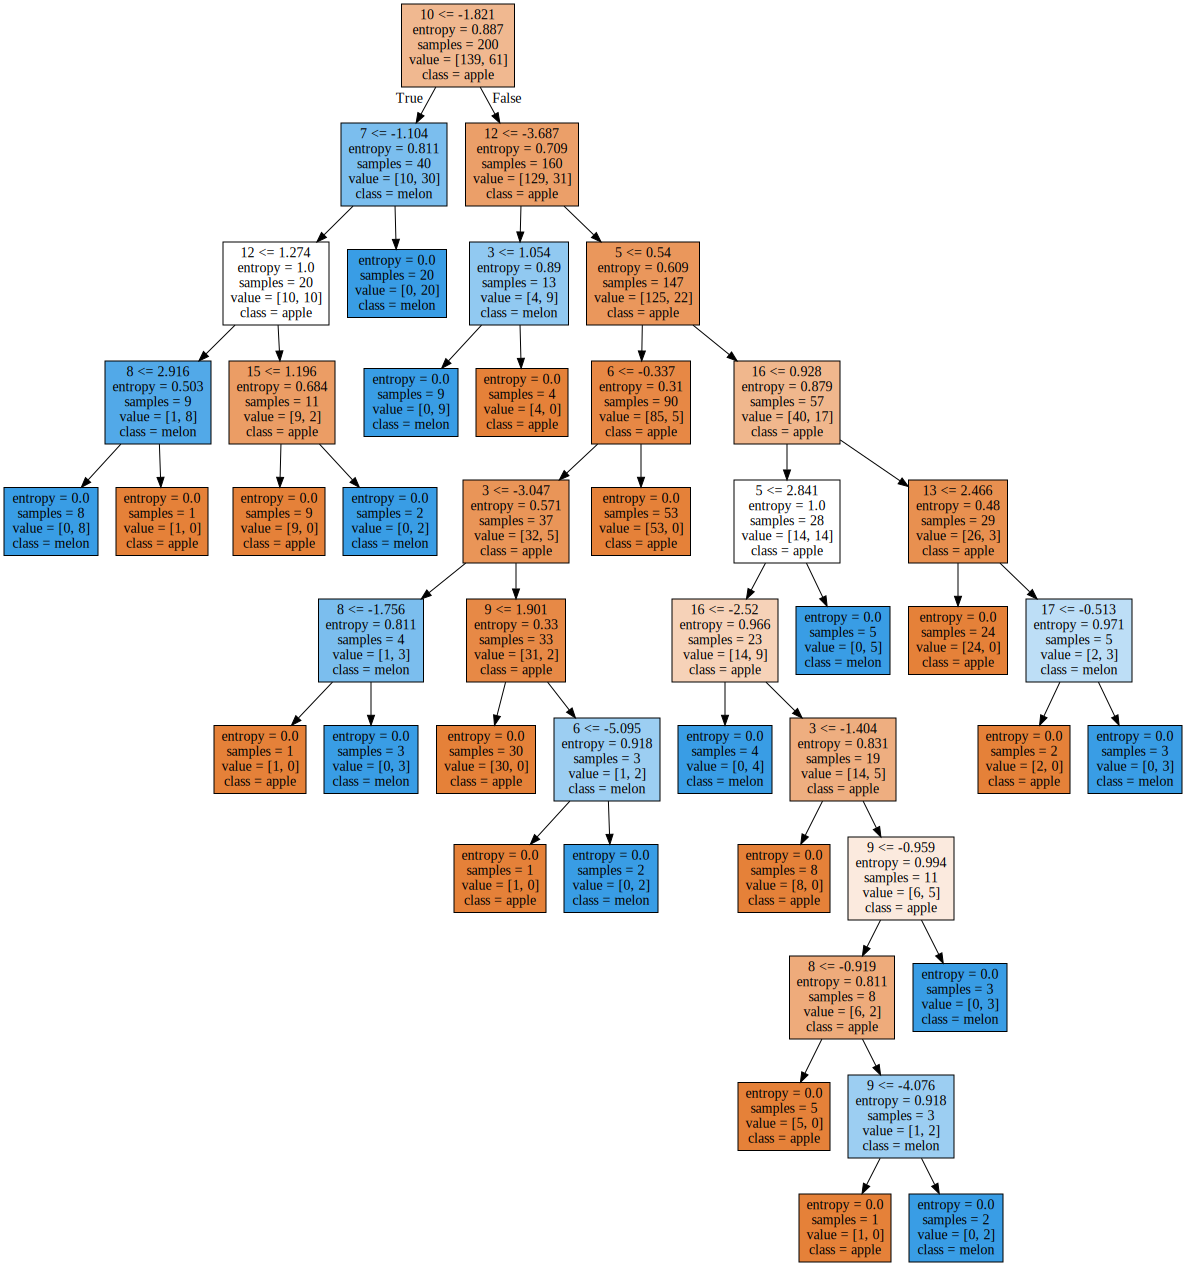

<Figure size 3600x3600 with 0 Axes>

In [134]:
clf = DecisionTreeClassifier(random_state=0 ,criterion = 'entropy' )
clf.fit(X, y)
fig = plt.figure(figsize=(50,50))
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names= features_name,  
                                class_names=['apple', 'melon'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


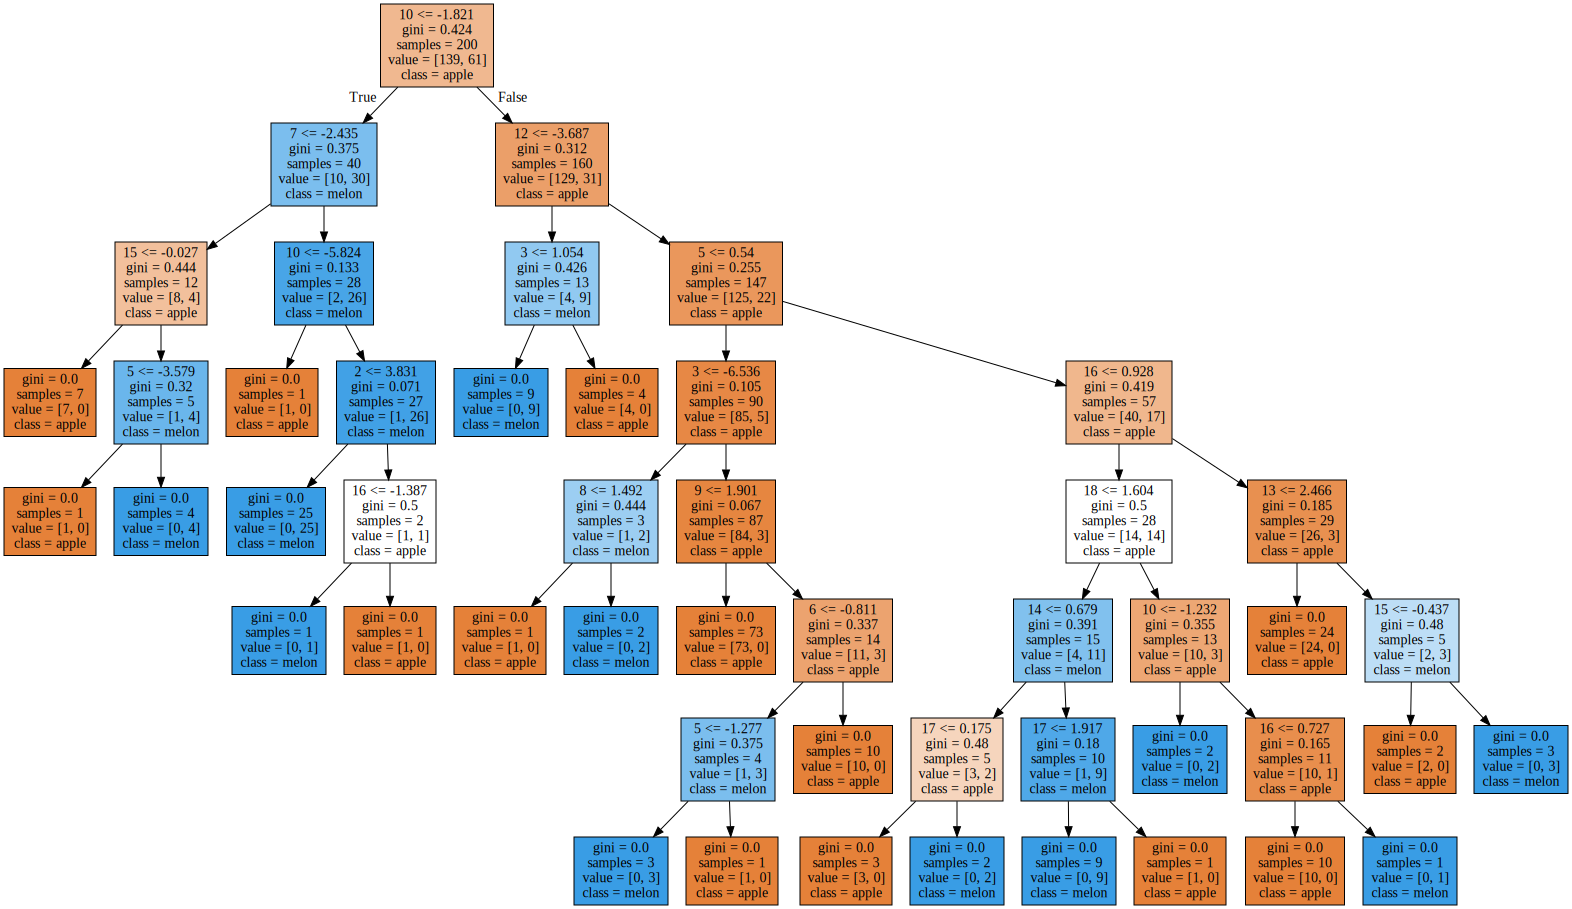

<Figure size 3600x3600 with 0 Axes>

In [135]:
clf = DecisionTreeClassifier(random_state=0 ,criterion = 'gini' )
clf.fit(X, y)
fig = plt.figure(figsize=(50,50))
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names= features_name,  
                                class_names=['apple', 'melon'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

# CONCLUSION FOR TREES WITH 18 INFORMATIVE FEATURES 

# The trees are again different, but this time they are more similar to one another. You can see that both trees use "7" and "12" features  to split the trees. However, they use different values for the split (for "12" it is the same but for  "7", it is -2.435 for Gini and -1.104 for Entropy. 

# 60% INFORMATIVE FEATURES, BALANCED DATASET, 5 FEATURES OVERALL

In [143]:
# let's consider very simple example, when we have only 5 features and Balanced Dataset. 
# 
X, y = datasets.make_classification(n_samples=200, n_features = 5, n_classes=2,n_informative=3,
                                     weights=[0.5, 0.5], random_state=42)

features_name = [str(i) for i in range(5)]


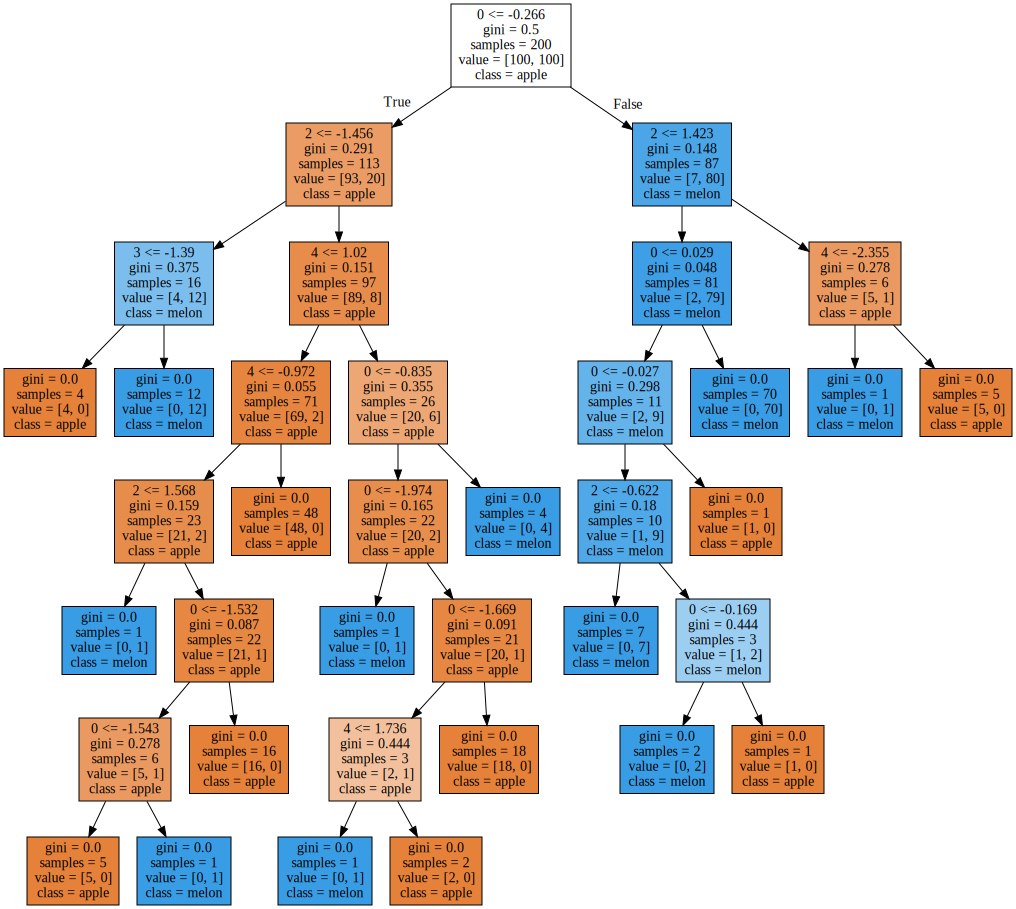

<Figure size 3600x3600 with 0 Axes>

In [144]:
clf = DecisionTreeClassifier(random_state=0 ,criterion = 'gini' )
clf.fit(X, y)
fig = plt.figure(figsize=(50,50))
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names= features_name,  
                                class_names=['apple', 'melon'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

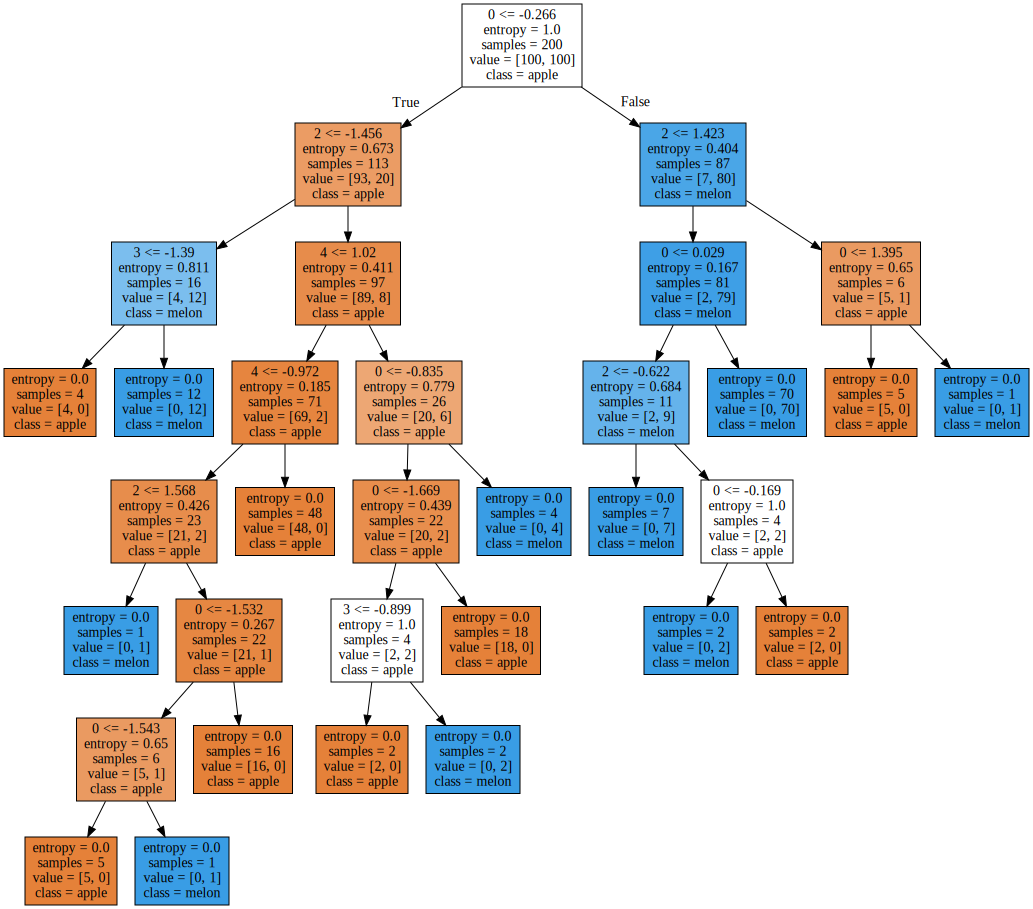

<Figure size 3600x3600 with 0 Axes>

In [145]:
clf = DecisionTreeClassifier(random_state=0 ,criterion = 'entropy' )
clf.fit(X, y)
fig = plt.figure(figsize=(50,50))
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names= features_name,  
                                class_names=['apple', 'melon'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

# CONCLUSION FOR BALANCED DATASET AND 5 OVERALL FEATURES

# As we can see the trees are almost identical, yet there are differences (for example the right outermost node on trees 3 level is '0' for the tree with entropy criterion, but '4' with the gini one



# CONCLUSION FOR THE COMPARISON BETWEEN TREES WITH GINI AND ENTROPY CRITERION 

# We can see that gini and entropy criteria do indeed create different trees. The more complex and unbalanced the data is, with more overall features and less informative ones, the stronger the difference between them will be.

# COMPARISON OF TRAINING TIME BETWEEN TREES WITH GINI INDEX AND TREES WITH ENTROPY CRITERION

# We will again create datasets of various samples and compare the difference between training times of trees with different criterions 

In [34]:
#We are starting with gini index, will train the trees on different number of sample (200000,250000 and 300000) 
#and store the training time


In [40]:
import time
training_samples = [200000,250000, 300000]
training_time_gini= []

In [41]:
for i in training_samples:
    X, y = datasets.make_classification(n_samples= i,  n_classes=2,n_features= 5,
                                     weights=[0.7, 0.3], random_state=42)
    
    clf = DecisionTreeClassifier(random_state=0 ,criterion = 'gini' )
    start= time.time()
    clf.fit(X, y)
    end= time.time()
    training_time_gini.append(round(end - start, ndigits= 3))
    
    

In [42]:
# gini training_time
training_time_gini

[2.611, 3.398, 4.534]

In [43]:
# now we will do the same for entropy 

In [44]:
training_samples = [200000,250000, 300000]
training_time_entropy= []

In [45]:
for i in training_samples:
    X, y = datasets.make_classification(n_samples= i,  n_classes=2,n_features =5,
                                     weights=[0.7, 0.3], random_state=42)
    
    clf = DecisionTreeClassifier(random_state=0 ,criterion = 'entropy' )
    start= time.time()
    clf.fit(X, y)
    end= time.time()
    training_time_entropy.append(round(end - start, ndigits= 3))

In [46]:
training_time_entropy

[3.172, 4.113, 5.663]

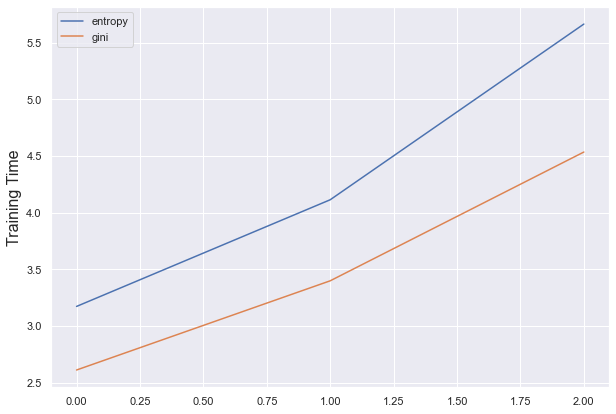

In [54]:
plt.figure(figsize = (10,7))
plt.ylabel('Training Time', fontsize=16)
plt.plot(training_time_entropy, label = 'entropy')
plt.plot(training_time_gini, label = 'gini')
plt.legend()
plt.show()

# Conclusion 


# The gini algorithms takes significantly less time to train. Probably because Entropy uses logarithm and multiplication operations, which are more computationaly expensive